In [ ]:
#Question 1 - Convolutional Layer

import torch

X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K1 = torch.tensor([[0.0, 1.0], [2.0, 3.0]]) # size: (2,2)
K2 = torch.tensor([[0.0, 1.0], [2.0, 3.0]]) # size: (2,2)

def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y


Y1 = corr2d(X, K1) 

print(Y1)

Y2 = corr2d(Y1, K2) 

print(Y2)

tensor([[19., 25.],
        [37., 43.]])
tensor([[228.]])


In [ ]:
#Question 1b

import torch

X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K1 = torch.tensor([[0.0, 1.0], [2.0, 3.0]]) # size: (2,2)
K2 = torch.tensor([[0.0, 1.0], [2.0, 3.0]]) # size: (2,2)

def trans_conv(X, K1, K2):
    # Apply first convolutional layer with kernel K1 and no padding
    Y1 = torch.nn.functional.conv2d(X.view(1, 1, *X.shape), K1.view(1, 1, *K1.shape), stride=1, padding=0)
    
    # Apply second convolutional layer with kernel K2 and no padding
    Y2 = torch.nn.functional.conv2d(Y1, K2.view(1, 1, *K2.shape), stride=1, padding=0)
    
    return Y2.squeeze()
    
y = trans_conv(X, K1, K2)
print(y)

tensor(228.)


In [ ]:
#Question 2 Setup

import torch

# define the input grid
grid1 = torch.zeros((1, 1, 16, 16))
grid1[0, 0, 7, 8] = 1
grid1[0, 0, 8, 7] = 1
grid1[0, 0, 9, 6] = 2
grid1[0, 0, 10, 5] = 2

# apply max pooling with a 2x2 kernel and stride of 2
output1 = torch.nn.functional.max_pool2d(grid1, kernel_size=2, stride=2)

# apply max pooling again with a 2x2 kernel and stride of 2
output1 = torch.nn.functional.max_pool2d(output1, kernel_size=2, stride=2)

print(output1)

# define the input grid
grid2 = torch.zeros((1, 1, 16, 16))
grid2[0, 0, 7, 8] = 1
grid2[0, 0, 8, 8] = 1
grid2[0, 0, 9, 8] = 2
grid2[0, 0, 10, 8] = 2

# apply max pooling with a 2x2 kernel and stride of 2
output2 = torch.nn.functional.max_pool2d(grid2, kernel_size=2, stride=2)

# apply max pooling again with a 2x2 kernel and stride of 2
output2 = torch.nn.functional.max_pool2d(output2, kernel_size=2, stride=2)

print(output2)


tensor([[[[0., 0., 0., 0.],
          [0., 0., 1., 0.],
          [0., 2., 0., 0.],
          [0., 0., 0., 0.]]]])
tensor([[[[0., 0., 0., 0.],
          [0., 0., 1., 0.],
          [0., 0., 2., 0.],
          [0., 0., 0., 0.]]]])


In [ ]:
#Question 2 

import torch

# define the input grid
grid = torch.zeros((1, 1, 16, 16))
grid[0, 0, 7, 8] = 1
grid[0, 0, 8, 7] = 1
grid[0, 0, 9, 6] = 2
grid[0, 0, 10, 5] = 2

# apply max pooling with a 4x4 kernel and stride of 4
output = torch.nn.functional.max_pool2d(grid, kernel_size=4, stride=4)

print(output)

# define the input grid
grid = torch.zeros((1, 1, 16, 16))
grid[0, 0, 7, 8] = 1
grid[0, 0, 8, 8] = 1
grid[0, 0, 9, 8] = 2
grid[0, 0, 10, 8] = 2

# apply max pooling with a 4x4 kernel and stride of 4
output2 = torch.nn.functional.max_pool2d(grid, kernel_size=4, stride=4)

print(output2)


tensor([[[[0., 0., 0., 0.],
          [0., 0., 1., 0.],
          [0., 2., 0., 0.],
          [0., 0., 0., 0.]]]])
tensor([[[[0., 0., 0., 0.],
          [0., 0., 1., 0.],
          [0., 0., 2., 0.],
          [0., 0., 0., 0.]]]])


In [ ]:
#While this does not match the graphic exactly, it does show that doubling the kernel and stride size is viable in eliminating one of the pooling layers.
#This makes sense because the 16x16 grid is directly reduced to a 4x4 grid since the 4x4 kernel covers twice the area in each stride, and as such the results for the above two are the same as expected.

loss 0.750, train acc 0.720, test acc 0.728
4620.0 examples/sec on cpu


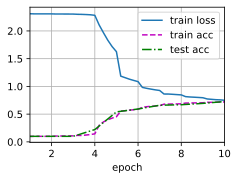

In [ ]:
#Question 3 - LeNet

#Starting code for Question 3
!pip install d2l==0.17.0

import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)
lr, num_epochs = 0.2, 10

#The original LeNet-5 code from textbook:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))

d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())


loss 0.493, train acc 0.825, test acc 0.855
3412.5 examples/sec on cpu


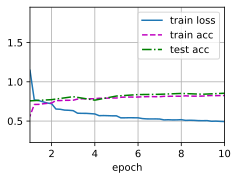

In [ ]:
# Updated LeNet-5

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)
lr, num_epochs = 0.2, 10

net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(84, 10)
)

d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())


In [ ]:
# As we can see, the training loss is much more abundant in the first few epochs, meaning that the new model is learning at a faster rate, and in general, this would be a good thing. 
# There could be cause for concern if the training and test accuracies were lower than that of the original LeNet5, which would point towards the model overfitting this data, however, that doesn't seem to be an issue here.

In [ ]:
#Question 4

!pip install d2l==0.17.6
!pip install matplotlib
!pip install matplotlib-inline

import torch
import torchtext

# The first time you run this will download a ~823MB file
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=50)   # embedding size = 50

In [ ]:
#Question 4 - Part 1

def print_closest_words(vec, n=5):
    dists = torch.norm(glove.vectors - vec, dim=1)     # compute distances to all words
    lst = sorted(enumerate(dists.numpy()), key=lambda x: x[1]) # sort by distance
    for idx, difference in lst[1:n+1]:                         # take the top n
        print(glove.itos[idx], difference)

print_closest_words(glove['king'] - glove['man'] + glove['woman'])

# What seems to be happening here, as we have defined it, is that we get the n = 5 words that we requested in the definition of this function and the words closest to 'Queen'. This is because, if we consider each of the words a vector,
# we have taken King, taken man away from it and added woman. Intuitively speaking, this would generally point towards female royalty and associated words and I would expect words such as 'princess' or perhaps 'consort' as opposed to 'prince' and 'widow'.
# However, it enitrely depends upon the torchtext model that has been used to train this specific GloVe, so it may not produce exactly the results you would expect, especially since that it is such an subjective thing to consider.
# Generally speaking, however, the results are what you would expect from the above command since the first word it gives is the word associated with woman, following on from the pattern of 'king' to 'man'.

# The explanation for this is that the vector operation subtracts the vector representation of king from man, and the subsequent difference is then applied to 'woman'. The vector addition of 'king'-'man' is 'queen'.


In [ ]:
#In order to illustrate the point further, we can use the example of:

print_closest_words(glove['fruit'] - glove['apple'] + glove['chicken'])

# Here, although plenty of the words in the list do not follow the exact pattern we have mentioned previously (again, entirely down to the intitial training of the glove function), we did manage to get 'meat':
# This is the appropriate vector addition to chicken when adding the vector difference between fruit and apple. Consequently, it would work with something like orange as well:


In [ ]:
print_closest_words(glove['fruit'] - glove['orange'] + glove['chicken'])

In [ ]:
# To further illustrate this idea, we can consider the following:

print_closest_words(glove['manager'] - glove['man'] + glove['woman'])

# This is quite a small change from the original example but illustrates the same issue, in that the highest associated word using this GloVe model for a woman (as 'manager' is to 'man') is 'assistant'. 
# The result doesn't suggest anything more than faulty training data, especially since the second word is 'owner' which is in line with 'manager' and makes no distinction of sex. However, it does show bias.

assistant 3.630413
owner 3.7025032
employee 3.7753458
fisher 3.7769353
hired 3.8142512


In [ ]:
# Question 4 - Part 2

print_closest_words(glove['doctor'] - glove['man'] + glove['woman'])

# The concerning thing about this output is that, due to the training of the model on real world data, some of the associations can be considered outdated and archaic , which may be contrued as offensive. Sometimes, the training data itself may be outdated, although it is uncertain what is happening here.
# For example, the fact that the vector difference between 'doctor' and 'man' (which we could consider generally, the role of men in the medical field), when applied to 'woman', results in 'nurse' being the top result is more a stereotype than reality.
# The fact is that nurses and doctors are seperated by education, training and expertise, rather than gender. However, due to the prevalence of primarily female nurses in media and on the internet, this association has cropped up as an output.
# Hence, the vector combination of certain words, or even association of isolated words may not be based on what the words actually mean, but what the model has been trained on instead. And the training of the model can clearly be suboptimal.

nurse 3.1355348
pregnant 3.780537
child 3.78347
woman 3.8643105
mother 3.9222305


In [1]:
!pip install nbconvert

!jupyter nbconvert --to html/content/HW3_41113.ipynb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.a

In [3]:
!jupyter nbconvert HW3_41113.ipynb --to html

[NbConvertApp] Converting notebook HW3_41113.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/jupyter_core/application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 488, in 